In [3]:
###############################################################################
##  Curso : Metodos Estadistico
##  Sesion : 11
##  Tema : Pruebas No Parametricas
###############################################################################

# Define path file
FILE_URL <- "https://raw.githubusercontent.com/jgomezz/MsEstadAplic_MetodosEstadisticos/master/data/metodos_estadisticos/semana-11/ANSI/Mc_Nemar.csv"
FILE_ENCONDING <- "ISO-8859-1"

# Read file
Depre.data <- read.csv(FILE_URL, fileEncoding = FILE_ENCONDING)
#
head(Depre.data)

Antes,Después
1,1
1,1
1,1
1,1
2,1
2,1


In [5]:
###############################################################################
#                        Prueba de Mc Nemar
###############################################################################
mcnemar.test(Depre.data[,"Antes"], Depre.data[,"Después"])

#  EL valor p-value = 0.04331 no es ajustado, no es el correcto


	McNemar's Chi-squared test with continuity correction

data:  Depre.data[, "Antes"] and Depre.data[, "Después"]
McNemar's chi-squared = 4.0833, df = 1, p-value = 0.04331


In [6]:
# cargo las librerias
install.packages("exact2x2")
library(exact2x2)

# Calculo la prueba de Mc Nemar corregida
mcnemar.exact(Depre.data[,"Antes"], Depre.data[,"Después"])


also installing the dependencies ‘exactci’, ‘ssanv’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: exactci
Loading required package: ssanv



	Exact McNemar test (with central confidence intervals)

data:  Depre.data[, "Antes"] and Depre.data[, "Después"]
b = 2, c = 10, p-value = 0.03857
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.02130704 0.93850199
sample estimates:
odds ratio 
       0.2 


In [8]:
# EL p-value = 0.03857 es el correcto
#
# Prueba de Hipotesis
#
#    1)  
#      H0:  El tratamiento no ha sido efectivo
#      H1 : EL tratamiento ha sido efectivo
#
#    2) alfa = 0.05
#
#    3) p-valor = 0.03857 < alfa , se rechaza H0
#
#    4) Conclusión: A un alfa = 0.05 , se puede afirmar que la frecuencia de depresión ha variado

In [7]:
###############################################################################
#                        lectura de datos de la Municipalidad
###############################################################################FILE2_URL <- "https://raw.githubusercontent.com/jgomezz/MsEstadAplic_MetodosEstadisticos/master/data/metodos_estadisticos/semana-11/ANSI/Caso_D.csv"
FILE2_ENCONDING <- "ISO-8859-1"

# Read file
Muni.data <- read.csv(FILE2_URL, fileEncoding = FILE2_ENCONDING)
#
head(Muni.data)

Distrito,Género,Pago.2014,Pago.2015,Robos,Atención,Opinión
Comas,Femenino,148.0,167.3,8,46.2,Muy Buena
Comas,Femenino,159.4,163.8,2,33.3,Excelente
Comas,Femenino,151.4,158.6,8,13.7,Pésima
Comas,Masculino,145.1,160.1,5,6.0,Excelente
Comas,Femenino,147.0,158.4,8,16.1,Pésima
Comas,Masculino,145.2,161.6,12,18.3,Regular


In [10]:
###############################################################################
#                        Prueba de Signos
###############################################################################
# Solo se aplica para una muestra y muestras pariadas

# Filtro solo la municipalidad de Comas
Comas.muni.data <- subset(Muni.data, Distrito=="Comas")

head(Comas.muni.data)

Distrito,Género,Pago.2014,Pago.2015,Robos,Atención,Opinión
Comas,Femenino,148.0,167.3,8,46.2,Muy Buena
Comas,Femenino,159.4,163.8,2,33.3,Excelente
Comas,Femenino,151.4,158.6,8,13.7,Pésima
Comas,Masculino,145.1,160.1,5,6.0,Excelente
Comas,Femenino,147.0,158.4,8,16.1,Pésima
Comas,Masculino,145.2,161.6,12,18.3,Regular


In [11]:
# Cargar las librerias para poder usar la Prueba de Signos
install.packages("BSDA")
library(BSDA)

also installing the dependency ‘e1071’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice

Attaching package: ‘BSDA’

The following object is masked from ‘package:datasets’:

    Orange



In [12]:
# Hipotesis
#
#     1) 
#         HO: Me_2014 = Me_2015    HO: Me = 0
#         H1: Me_2014 <> Me_2015   H1: Me <> 0
#    
#     2)  alfa = 0.05
#
#     3)  p-valor = ?
#
#     4)  Conclusion ......

SIGN.test(Comas.muni.data[,"Pago.2014"], Comas.muni.data[,"Pago.2015"], md=0, alternative="t")

# Se calcula que p-value = 5.614e-06


	Dependent-samples Sign-Test

data:  Comas.muni.data[, "Pago.2014"] and Comas.muni.data[, "Pago.2015"]
S = 9, p-value = 5.614e-06
alternative hypothesis: true median difference is not equal to 0
95 percent confidence interval:
 -10.792977  -7.014046
sample estimates:
median of x-y 
         -9.5 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level  L.E.pt U.E.pt
Lower Achieved CI     0.9351 -10.700 -7.200
Interpolated CI       0.9500 -10.793 -7.014
Upper Achieved CI     0.9672 -10.900 -6.800


In [13]:
SIGN.test(Comas.muni.data[,"Pago.2015"], Comas.muni.data[,"Pago.2014"], md=10, alternative="l")


	Dependent-samples Sign-Test

data:  Comas.muni.data[, "Pago.2015"] and Comas.muni.data[, "Pago.2014"]
S = 22, p-value = 0.2399
alternative hypothesis: true median difference is less than 10
95 percent confidence interval:
     -Inf 10.50509
sample estimates:
median of x-y 
          9.5 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt  U.E.pt
Lower Achieved CI     0.9405   -Inf 10.4000
Interpolated CI       0.9500   -Inf 10.5051
Upper Achieved CI     0.9675   -Inf 10.7000


In [14]:
###############################################################################
#                        Prueba de Wilcoxon
###############################################################################
# Se debe analizar la simetria de la diferencia

# Cargar las librerias para realizar la prueba de simetria
install.packages("moments")
library(moments)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
# Calculo del coeficiente de simetria
skewness(Comas.muni.data[,"Pago.2014"]-Comas.muni.data[,"Pago.2015"])

[1] 0.224686

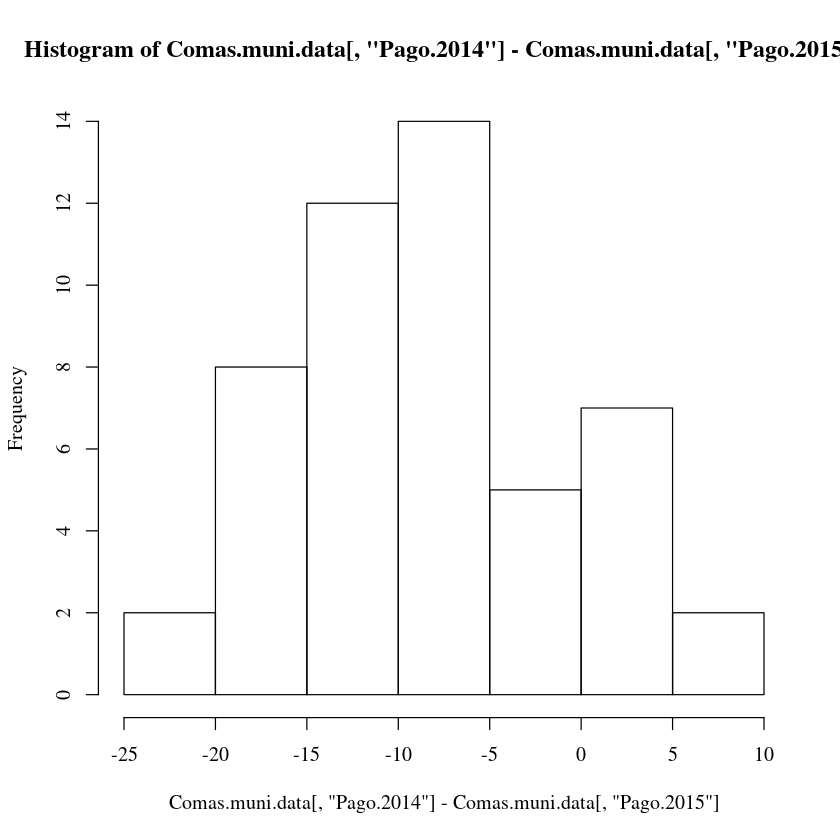

In [16]:
# EL valor 0.224686046539319 es cercano a cero, nos haria pensar que es simetrico
# nos apoyamos en un gráfico de histograma para ver si es simetríco
hist(Comas.muni.data[,"Pago.2014"]-Comas.muni.data[,"Pago.2015"])